In [1]:
import numpy as np


In [2]:
M_solar = 2 * 10**30 #kg
M_BH = 10**7 *M_solar
E_p = np.logspace(-3, 6,1000)
B = 6 #>6kG
gamma_p = 2.1
m_p = 0.936#MeV/c^2
e = 1
q = 5/3 
tau_T = 0.5
G = 6.67 * 10**-11#m^3/kg s^2
L_X = 7 * 10**43 #erg/s
eta = 10 * (B/6)**2#B/6(kG)
c = 3 * 10**8
R_s = (2 * G * M_BH)/c**2
R = 17*R_s
sigma_T =1
n_p = 3**0.5 * tau_T / (sigma_T * R)
v_A = B/(4 * np.pi* m_p * n_p)**0.5
E_p_max = 3 * 10**5 *(B/10)**4 * (R/(25*R_s))**(5/3) * (M_BH/(2 * 10**7 * M_solar))**(5/3) * (25/eta)**3 * (0.5/tau_T)**(3/2)#(3 * v_A / (eta * c))**(1/(2-q))
t_diff = (3 * 3**0.5)/(eta * c) *((e * B * R)/(3**0.5 * E_p))**(1/3)
sigma_pp = 1
k_pp = 0.5
tau_pp = n_p * k_pp * sigma_pp * c *t_diff
X = (1-np.exp(-(E_p)/(m_p * c**2))) * (E_p)**-gamma_p * np.exp(-E_p/E_p_max)
integrand = E_p * X * (1 - np.exp(-tau_pp))
E_nu = 0.5 * (integrand)#E_nu**2 dN_nu/dE_nu

/tmp/ipykernel_8584/3443317954.py:36: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand_vectorized, E_p[0], e_val)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


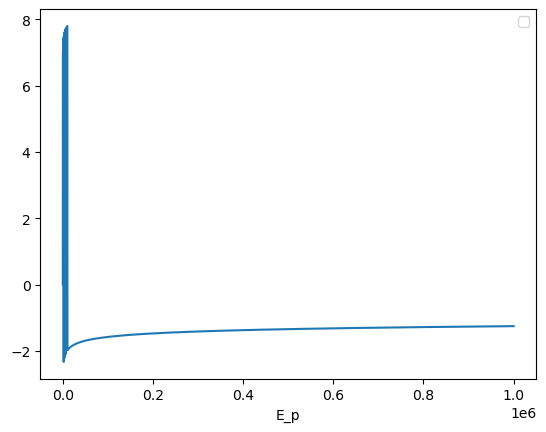

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy import vectorize

M_solar = 2 * 10**30  * 1.78 * 10**-21# GeV
M_BH = 10**7 * M_solar  # GeV
E_p = np.logspace(-3, 6, 1000) # GeV
B = 6 * 1.95 *10**-17 # >6kG kG-> 1.95 * 10**-17 GeV^-2
gamma_p = 2.1
m_p = 9.36*10**-4  # GeV/c^2
e = 0.30286 # 
q = 5/3 
tau_T = 0.5
G = 1.32 * 10**-38  # GeV^-2
#L_X = 7 * 10**43  # erg/s
eta = 10 * (B/6)**2  # GeV^-2 [B>6(kG)] 
c = 1#3 * 10**8  m/s check this term if it needs to be unit or not  
R_s = (2 * G * M_BH) / c**2
R = 17 * R_s
sigma_T =  2.611 * 10**-51 # GeV^-2
n_p = 3**0.5 * tau_T / (sigma_T * R)
#v_A = B / (4 * np.pi * m_p * n_p)**0.5
E_p_max = 3 * 10**5 * (B/10)**4 * (R/(25 * R_s))**(5/3) * (M_BH/(2 * 10**7 * M_solar))**(5/3) * (25/eta)**3 * (0.5/tau_T)**(3/2)
t_diff = ((3 * 3**0.5) / (eta * c))* ((e * B * R) / (3**0.5 * E_p))**(1/3)
sigma_pp = 10**-50

k_pp = 0.5
tau_pp = n_p * k_pp * sigma_pp * 1.24 * 10**10 * t_diff

integrand_vectorized = vectorize(lambda E_p: integrand(E_p)[0])

results = []

for e_val in E_p:
    result, _ = quad(integrand_vectorized, E_p[0], e_val)
    results.append(result)

E_nu = 0.5 * np.array(results)  # E_nu**2 dN_nu/dE_nu

plt.plot(E_p, E_nu, label='')
plt.xlabel('E_p')
plt.ylabel('')
plt.title('')
plt.legend()
plt.show()

In [ ]:
print(3 * 10**)